In [18]:
import matplotlib.pyplot as plt
import numpy as np
from torch import fbgemm_linear_fp16_weight_fp32_activation
from tqdm import tqdm
clsw2 = "/N/slate/tnn3/HaiND/01-06_report/result/metrics/metrics_t2_rus4_cw3.txt"


def extract(path):
	with open(path,"r") as file:
		data = file.read().split("\n")

	precision = float(data[1][11:].strip())
	recall = float(data[2][8:].strip())
	f1 = float(data[3][10:].strip())
	return precision,recall,f1

pre_w1 = []
recall_w1 = []
f1_w1 = []

pre_w2 = []
recall_w2 = []
f1_w2 = []

pre_w3 = []
recall_w3 = []
f1_w3 = []

rus = 4

for step in tqdm(range(2,10,2)):
    path1 = f"/N/slate/tnn3/HaiND/01-06_report/result/metrics/metrics_t{step}_rus{rus}_cw1.txt"
    path2 = f"/N/slate/tnn3/HaiND/01-06_report/result/metrics/metrics_t{step}_rus{rus}_cw2.txt"
    path3 = f"/N/slate/tnn3/HaiND/01-06_report/result/metrics/metrics_t{step}_rus{rus}_cw3.txt"
    
    res1 = extract(path1)
    res2 = extract(path2)
    res3 = extract(path3)
    
    pre_w1.append(res1[0])
    recall_w1.append(res1[1])
    f1_w1.append(res1[2])
    
    pre_w2.append(res2[0])
    recall_w2.append(res2[1])
    f1_w2.append(res2[2])
    
    pre_w3.append(res3[0])
    recall_w3.append(res3[1])
    f1_w3.append(res3[2])

        
    

100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


In [3]:
pre_w2

[0.3626, 0.3582, 0.2104, 0.3602]

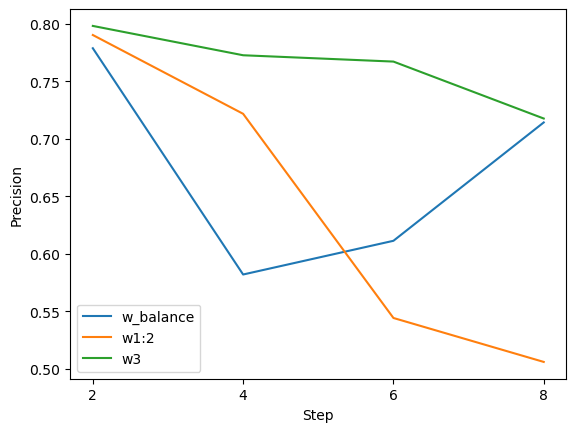

In [19]:
plt.figure()
x_ = [2,4,6,8]
plt.plot(x_,pre_w1,label = "w_balance")
plt.plot(x_,pre_w2,label = "w1:2")
plt.plot(x_,pre_w3,label="w3")
plt.xlabel("Step")
plt.ylabel("Precision")
plt.xticks([2,4,6,8])
plt.legend()

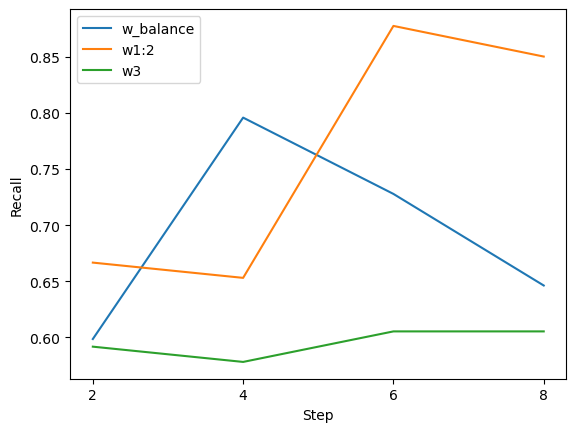

In [20]:
plt.figure()
x_ = [2,4,6,8]
plt.plot(x_,recall_w1,label = "w_balance")
plt.plot(x_,recall_w2,label = "w1:2")
plt.plot(x_,recall_w3,label="w3")
plt.xlabel("Step")
plt.ylabel("Recall")
plt.xticks([2,4,6,8])
plt.legend()

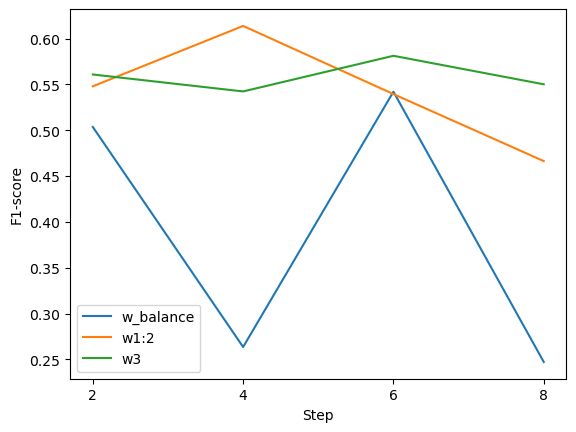

In [16]:
plt.figure()
x_ = [2,4,6,8]
plt.plot(x_,f1_w1,label = "w_balance")
plt.plot(x_,f1_w2,label = "w1:2")
plt.plot(x_,f1_w3,label="w3")
plt.xlabel("Step")
plt.ylabel("F1-score")
plt.xticks([2,4,6,8])
plt.legend()